<h1> <font color='green'>The Sparks foundation </font> </h1>

### Author: Pratik Patil
### Linkedin <a href='https://www.linkedin.com/in/pratik-patil-3108081a5/'> link</a>

### Task 5: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 

### Aim: As a sports analysts, find out the most successful teams, players and factorscontributing win or loss of a team.  
### Suggest teams or players a company should endorse for its products. 


<img src='https://thesparksfoundation.info/images/logo.png' width="300" height="400">

# dataset 
kaggle <a href='https://www.kaggle.com/ramjidoolla/ipl-data-set'>Link</a><br>
Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}

<IPython.core.display.Javascript object>

In [3]:
deliveries=pd.read_csv('deliveries.csv')
match=pd.read_csv('matches.csv')

In [4]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [5]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Data Cleaning

In [6]:
match.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
match.duplicated().sum()

0

In [8]:
match.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [9]:

print("Total number of Seasons of IPL:", len(match["season"].unique()))

Total number of Seasons of IPL: 12


In [10]:
print("Venues/Stadiums in which IPL was held:\n\n",match.venue.unique())


Venues/Stadiums in which IPL was held:

 ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadiu

In [11]:
print("Cities in which IPL was played:\n\n", match.city.value_counts())

Cities in which IPL was played:

 Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Ranchi              7
Cape Town           7
Abu Dhabi           7
Cuttack             7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64


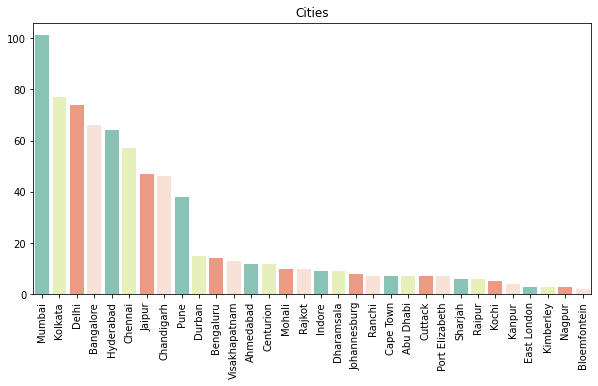

In [12]:

plt.figure(figsize = (10,5))
sns.barplot(match['city'].value_counts().index,match['city'].value_counts().values, palette= ["#7fcdbb","#edf8b1","#fc9272", "#fee0d2"])
plt.title('Cities')
plt.xticks(rotation = 90);

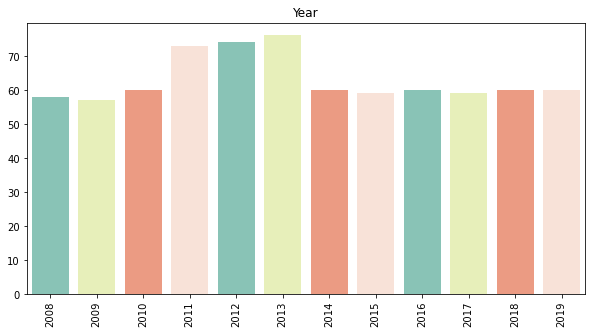

In [13]:

plt.figure(figsize = (10,5))
sns.barplot(match['season'].value_counts().index,match['season'].value_counts().values, palette= ["#7fcdbb","#edf8b1","#fc9272", "#fee0d2"])
plt.title('Year')
plt.xticks(rotation = 90);

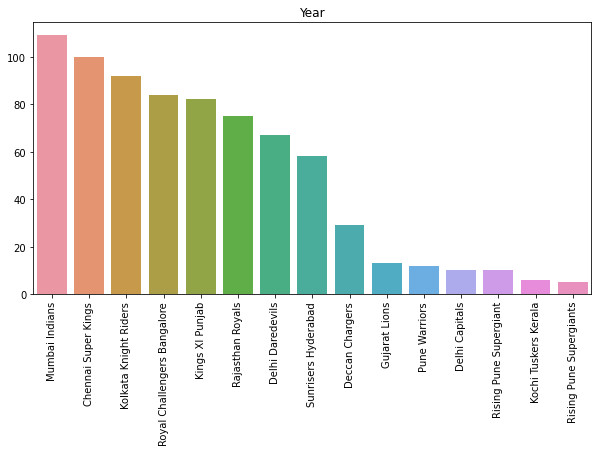

In [14]:

plt.figure(figsize = (10,5))
sns.barplot(match['winner'].value_counts().index,match['winner'].value_counts().values)
plt.title('Year')
plt.xticks(rotation = 90);

Text(0.5, 1.0, 'Most busy Stadiums/Venues')

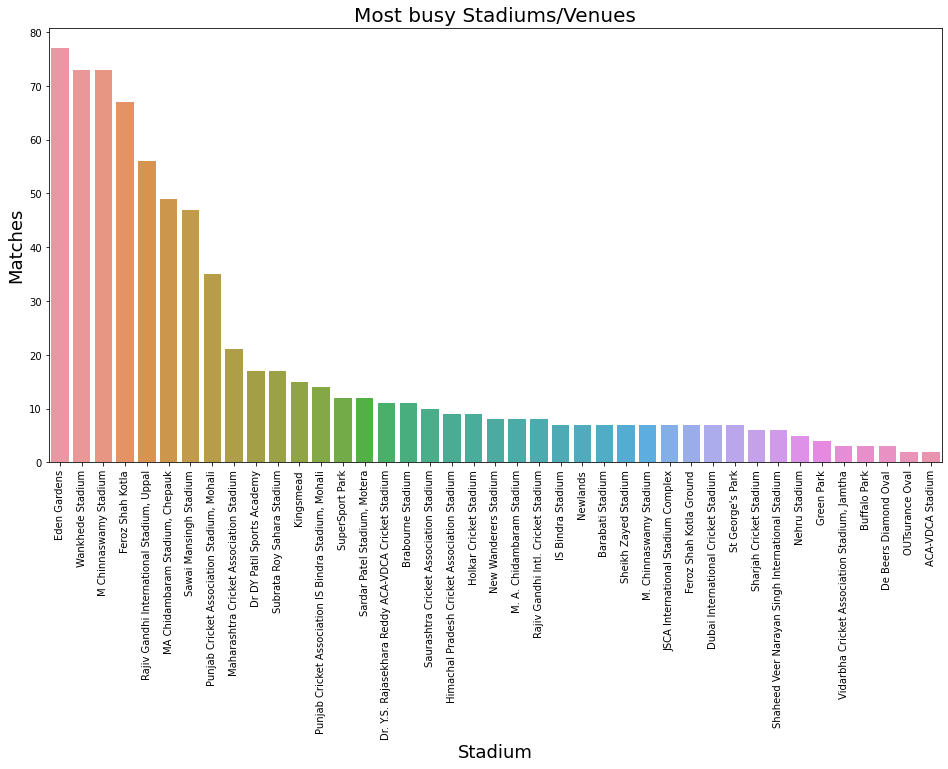

In [22]:
# countplot showiing Most busy stadiums/venues
plt.figure(figsize=(16,8))
sns.countplot(x = match["venue"], order=match["venue"].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Stadium", fontsize=18)
plt.ylabel("Matches", fontsize=18)
plt.title("Most busy Stadiums/Venues", fontsize=20)

Text(0.5, 1.0, 'Most Valuable Players')

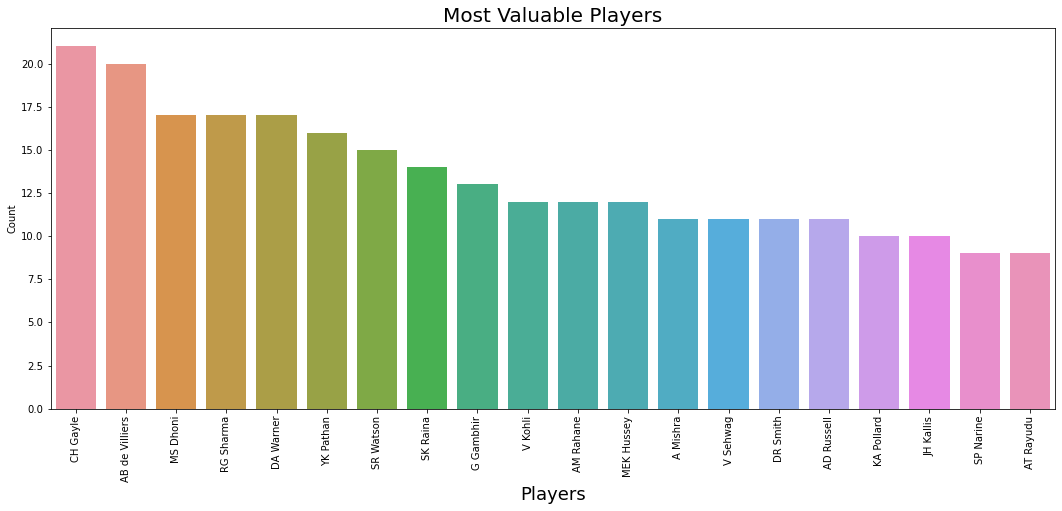

In [16]:
# barplot showing most valueable players
plt.figure(figsize=(18,7))
sns.barplot(x= match.player_of_match.value_counts()[:20].index,y= match.player_of_match.value_counts()[:20])
plt.xlabel("Players", fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Most Valuable Players", fontsize=20)

Text(0.5, 1.0, 'Toss Winning Record')

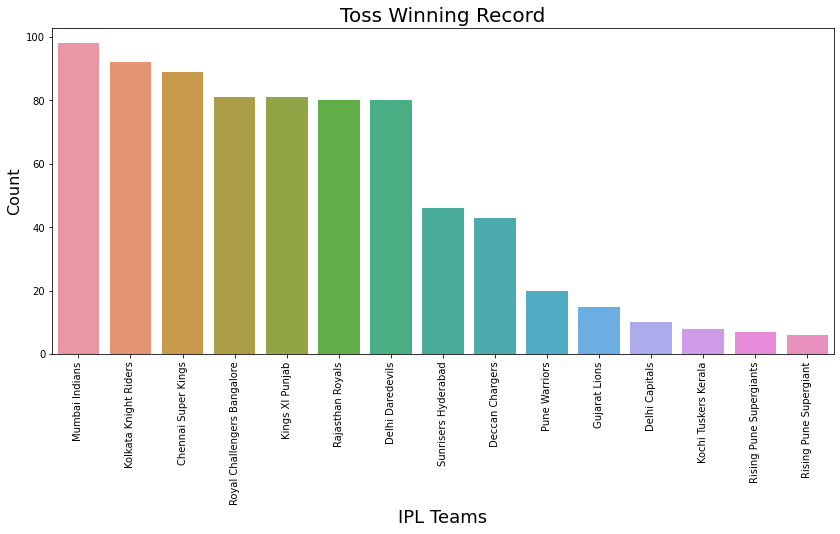

In [17]:
# countplot showing record of teams winning toss
plt.figure(figsize=(14,6))
sns.countplot(x = match["toss_winner"], order = match["toss_winner"].value_counts().index)
plt.xlabel("IPL Teams", fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count", fontsize=16)
plt.title("Toss Winning Record", fontsize=20)

In [18]:
deliveries.shape

(179078, 21)

In [19]:
# Total matches where the tie led to a superover
deliveries['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [20]:
# net runs obtained from  no balls
sum(deliveries['noball_runs'])

749

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

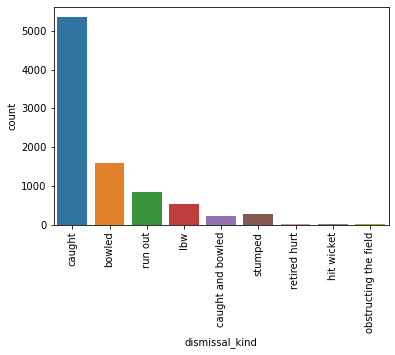

In [21]:
# kinds of dismissal
sns.countplot(x = deliveries['dismissal_kind'], data = deliveries)
plt.xticks(rotation = 90)


# The Following results were obtained from the EDA over the IPL match Datasets
---> <b>Mumbai Indians</b> have emerged as Winners, the maximum number of times.

---> <b><i>Eden gardens</i></b> is the stadium where maximum matches have been played.

---> <font color='green'>Chris Gayle</font> has been the Player of The Match , maximum times.

---> There are many other factors that proved instrumental in Data Analysis including venue, city, toss_decision etc..

###### Reference 

---> https://github.com/anmol1810rs/The_Sparks_Foundation_Internship/blob/main/GRIP_TASK5_IPL_Exploratory_Data_Analysis.ipynb<br>
--->https://github.com/purvitsharma/The-Sparks-Foundation/blob/Main/Task%205.ipynb